# Computer Vision and Object Detection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.
네트워크 통신을 위해서 reqests 패키지를 import 합니다.

In [1]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [3]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [4]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [5]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [6]:
analyze_url = vision_base_url + 'analyze'

In [7]:
image_url = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile29.uf.tistory.com%2Fimage%2F222D554655A18D19349EBD'

In [8]:
response = requests.get(image_url)

In [9]:
image = Image.open(BytesIO(response.content))

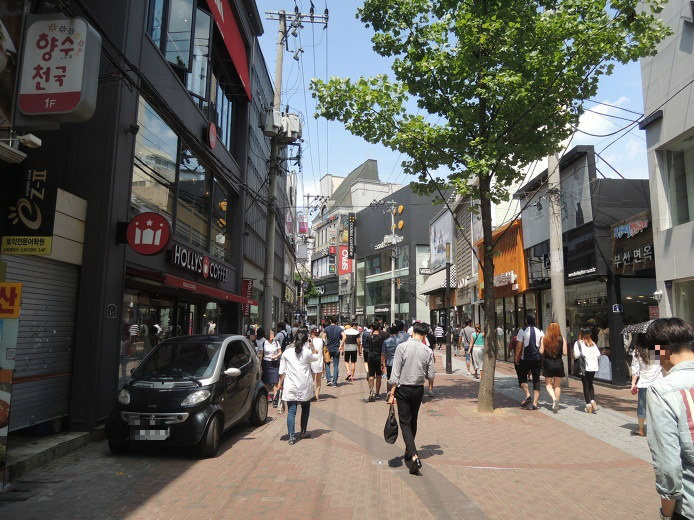

In [10]:
image

In [11]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [12]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [13]:
analysis = response.json()

분석 결과 입니다. 분석결과에는 랜드마크를 비롯해서 인지한 개체들과 문장으로 구성된 결과가 포함 되어 있습니다.

In [14]:
analysis

{'categories': [{'name': 'outdoor_street',
   'score': 0.99609375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Black',
  'dominantColors': ['Black', 'Grey'],
  'accentColor': '386493',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'building',
   'street',
   'walking',
   'road',
   'person',
   'scene',
   'city',
   'sidewalk',
   'people',
   'busy',
   'man',
   'crossing',
   'standing',
   'group',
   'cross',
   'bus',
   'woman',
   'riding',
   'corner',
   'pedestrians',
   'large',
   'crowded',
   'tall',
   'sign',
   'holding',
   'parked'],
  'captions': [{'text': 'a group of people walking down a busy city street',
    'confidence': 0.9961427665025614}]},
 'requestId': '2137cb57-8049-49e7-86f5-dab3af3870f9',
 'metadata': {'height': 520, 'width': 694, 'format': 'Jpeg'}}

In [15]:
analysis['description']['captions'][0]['text']

'a group of people walking down a busy city street'

# Object Detection

In [16]:
objectDetection_url = vision_base_url + 'detect'

In [17]:
object_image = 'https://www.newsmin.co.kr/news/wp-content/uploads/2021/05/05180000dddd-1-1536x904.jpg'

In [18]:
img = Image.open(BytesIO(requests.get(object_image).content))

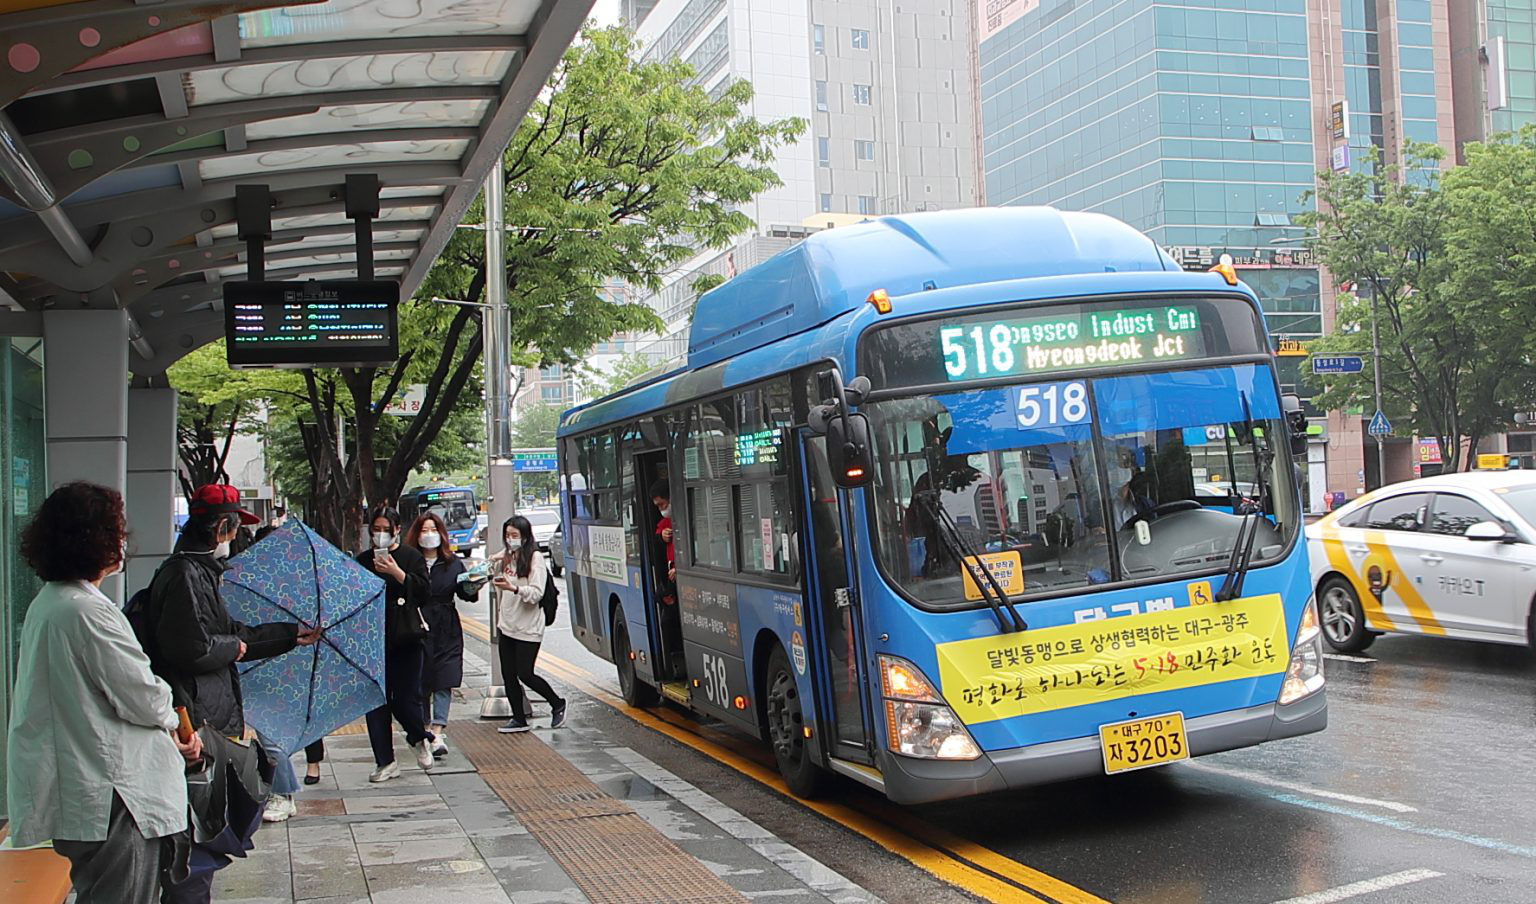

In [19]:
img

In [20]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url':object_image}

In [21]:
response = requests.post(objectDetection_url, headers = headers, json = data)

In [22]:
detectionResult = response.json()

In [23]:
detectionResult

{'objects': [{'rectangle': {'x': 1310, 'y': 474, 'w': 222, 'h': 193},
   'object': 'taxi',
   'confidence': 0.522,
   'parent': {'object': 'car',
    'confidence': 0.828,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.848,
     'parent': {'object': 'Vehicle', 'confidence': 0.849}}}},
  {'rectangle': {'x': 5, 'y': 483, 'w': 198, 'h': 421},
   'object': 'person',
   'confidence': 0.809},
  {'rectangle': {'x': 144, 'y': 490, 'w': 148, 'h': 393},
   'object': 'person',
   'confidence': 0.747},
  {'rectangle': {'x': 560, 'y': 219, 'w': 751, 'h': 590},
   'object': 'shuttle bus',
   'confidence': 0.918,
   'parent': {'object': 'bus',
    'confidence': 0.928,
    'parent': {'object': 'Land vehicle',
     'confidence': 0.94,
     'parent': {'object': 'Vehicle', 'confidence': 0.94}}}}],
 'requestId': '8ad31989-852f-4a7e-9d5b-d914eed2b45f',
 'metadata': {'height': 904, 'width': 1536, 'format': 'Jpeg'}}

In [24]:
from PIL import Image, ImageDraw, ImageFont

In [25]:
draw = ImageDraw.Draw(img)

objects = detectionResult['objects']

for obj in objects:
#     print(obj)
    
    rect = obj['rectangle']
    
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    
    draw.rectangle(((x, y), (x + w, y + h)), outline='red')

{'rectangle': {'x': 1310, 'y': 474, 'w': 222, 'h': 193}, 'object': 'taxi', 'confidence': 0.522, 'parent': {'object': 'car', 'confidence': 0.828, 'parent': {'object': 'Land vehicle', 'confidence': 0.848, 'parent': {'object': 'Vehicle', 'confidence': 0.849}}}}
{'rectangle': {'x': 5, 'y': 483, 'w': 198, 'h': 421}, 'object': 'person', 'confidence': 0.809}
{'rectangle': {'x': 144, 'y': 490, 'w': 148, 'h': 393}, 'object': 'person', 'confidence': 0.747}
{'rectangle': {'x': 560, 'y': 219, 'w': 751, 'h': 590}, 'object': 'shuttle bus', 'confidence': 0.918, 'parent': {'object': 'bus', 'confidence': 0.928, 'parent': {'object': 'Land vehicle', 'confidence': 0.94, 'parent': {'object': 'Vehicle', 'confidence': 0.94}}}}


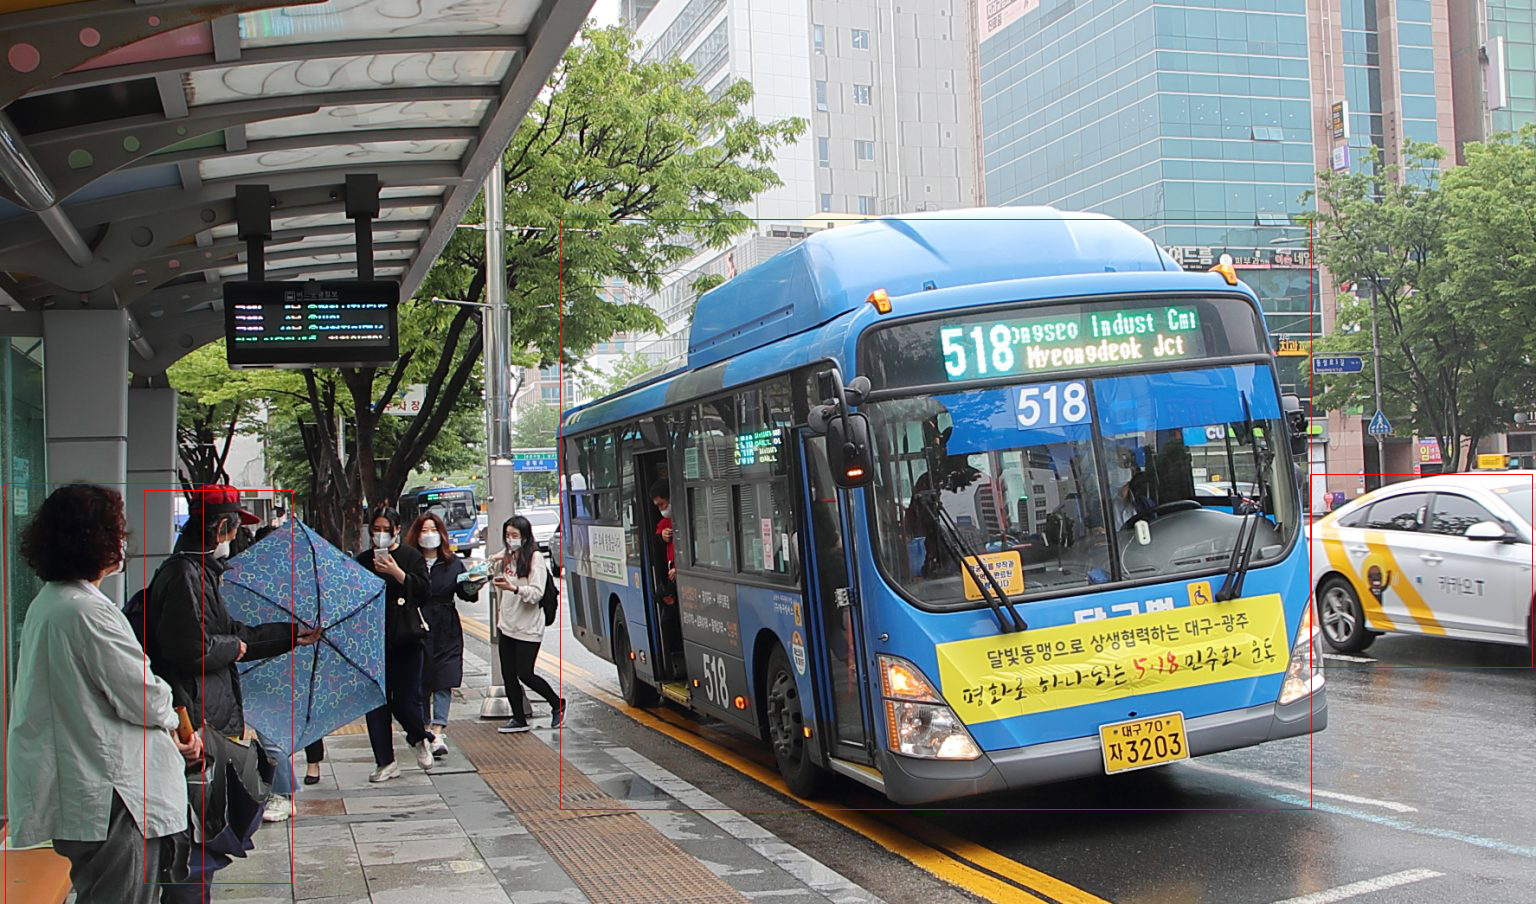

In [26]:
img